In [6]:
import pandas as pd
import requests
from venn import venn

In [2]:
datasets = [
    "https://s3.amazonaws.com/maayan-kg/reprotox/reprotox_serialization.valid.json",
    "https://s3.amazonaws.com/maayan-kg/reprotox/sigcom_lincs_serialization.valid.json",
    "https://s3.amazonaws.com/maayan-kg/reprotox/sigcom_lincs_drug_similarity.valid.json",
    "https://s3.amazonaws.com/maayan-kg/reprotox/drugsto_faers_male.valid.json",
    "https://s3.amazonaws.com/maayan-kg/reprotox/drugsto_faers_female.valid.json",
    "https://s3.amazonaws.com/maayan-kg/reprotox/hpo.valid.json",
    "https://s3.amazonaws.com/maayan-kg/reprotox/archs4_coexpression.valid.json",
    "https://s3.amazonaws.com/maayan-kg/reprotox/Drugshot_HPO_to_Drug.valid.json",
    "https://s3.amazonaws.com/maayan-kg/reprotox/Geneshot_HPO_to_Gene.valid.json",
    "https://s3.amazonaws.com/maayan-kg/reprotox/idg_drug_targets.valid.json",
]

In [3]:
drugs = {}
for i in datasets:
    print(i.split("/")[-1].replace(".valid.json", ".json"))
    res = requests.get(i)
    serialized = res.json()
    for n in serialized["nodes"].values():
        if n["type"] == "Drug":
            drugs[n["properties"]["id"]] = n

reprotox_serialization.json
sigcom_lincs_serialization.json
sigcom_lincs_drug_similarity.json
drugsto_faers_male.json
drugsto_faers_female.json
hpo.json
archs4_coexpression.json
Drugshot_HPO_to_Drug.json
Geneshot_HPO_to_Gene.json
idg_drug_targets.json


In [4]:
len(drugs)

5320

In [11]:
teratogen_df = pd.read_csv("data/teratogen.tsv", sep="\t", index_col = 0)
teratogen_df.head()

,Year of FDA approval,TERIS risk rating,Quality of Data,FDA Category,Unnamed: 5,Unnamed: 6
Drug,,,,,,
Abarelix,2003.0,Undetermined,None,X,NaN,NaN
Acamprosate,2004.0,Undetermined,None,C,NaN,NaN
Adefovir,2002.0,Undetermined,Very Limited,C,NaN,NaN
Alcaftadine,2010.0,Undetermined,None,B,NaN,NaN
Alfuzosin,2003.0,Undetermined,None,B,NaN,NaN


In [12]:
teratogen_df = teratogen_df[(teratogen_df["FDA Category"] == 'X') | (teratogen_df["FDA Category"] == 'D')]
teratogen_df.head()

,Year of FDA approval,TERIS risk rating,Quality of Data,FDA Category,Unnamed: 5,Unnamed: 6
Drug,,,,,,
Abarelix,2003.0,Undetermined,None,X,NaN,NaN
Aliskiren,2007.0,Undetermined,None,D,NaN,NaN
Ambrisentan,2007.0,Undetermined,None,X,NaN,NaN
Azacitidine,2004.0,Undetermined*,Limited-Fair,D,NaN,NaN
Bendamustine,2008.0,Undetermined*,None,D,NaN,NaN


In [21]:
tera_drugs = [i.lower().strip() for i in teratogen_df.index]
len(tera_drugs)

41

In [22]:
repro_drugs = [i["properties"]["label"].strip().lower() for i in drugs.values()]
len(repro_drugs)

5320

<AxesSubplot: >

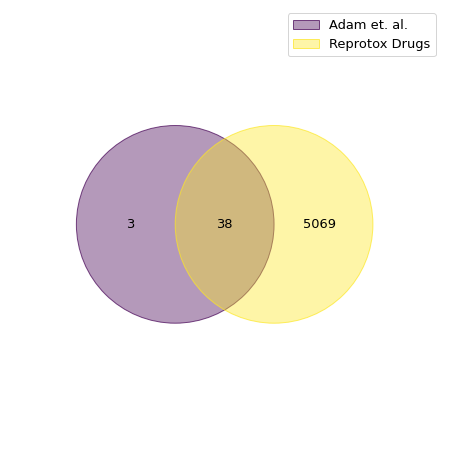

In [23]:
all_drugs = {
    "Adam et. al.": set(tera_drugs),
    "Reprotox Drugs": set(repro_drugs)
}

venn(all_drugs)

In [20]:
set(tera_drugs) - set(repro_drugs)

{'biskalcitrate', 'lenalidomide ', 'oxaliplatin', 'tesamorelin', 'ulipristal '}

In [29]:
drug_names = {}
drug_properties = {}
for k,v in drugs.items():
    label = v["properties"]["label"].lower()
    cid = v["properties"]["id"]
    if label in drug_properties:
        if "SMILES" not in drug_properties[label]["properties"] and 'SMILES' in v["properties"]:
            drug_properties[label] = v
    else:
        drug_properties[label] = v

In [30]:
len(drug_properties)

5107